# INTRODUCTION

In [86]:
# Basic tools
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
from numpy import argmax, mean, diff, log
from matplotlib.mlab import find
import matplotlib.patches as mpatches

# Feature extraction
import librosa 
!pip install soundfile
import soundfile as sf

# Data adquisition
import pandas as pd

# Learning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

print("\nsoundfile installed. Necessary libraries imported.")


soundfile installed. Necessary libraries imported.


In [0]:
#Load the Drive helper and mount
from google.colab import drive

#This will prompt the authentification
drive.mount('/content/drive')

# To acces to the directory
!ls '/content/drive/My Drive/TFG - Ariadna'
myDrive = '/content/drive/My Drive/TFG - Ariadna'

# Import Data
---
Importing X_train, y_train, X_test and y_test from csv files.

In [0]:
EXERCISE = 14
PART = 4
myDriveTest = '/content/drive/My Drive/TFG - Ariadna/Data_test/'
features_extracted = ["pitch","centroid", "flatness", "rolloff", "zero-crossing", "mel_01", "mel_02", "mel_03", "mel_04", "mel_05", "mel_06", "mel_07", "mel_08", "mel_09", "mel_10", "mel_11", "mel_12", "mel_13", "mel_14", "mel_15", "label"]

""" ------------------------------- TRAIN ---------------------------------- """
# Read dataset to pandas dataframe
if (PART != 0):
    csv_filename = myDriveTest + 'ex' + str(EXERCISE) +'-noreb-p' + str(PART)+ '.csv'
else:
    csv_filename = myDriveTest + 'ex' + str(EXERCISE) +'-noreb.csv'
dataset = pd.read_csv(csv_filename, names=features_extracted)
print(csv_filename, ' extracted TRAIN data')

# Get training dataset
X_train = dataset.iloc[:, :-1].values  
y_train = dataset.iloc[:, 20].values

#print(dataset.iloc[1:10, :-1].values )
print("Imported Train dataset")


""" ------------------------------- TEST ----------------------------------- """
# Read dataset to pandas dataframe
if (PART != 0):
    csv_filename = myDriveTest + 'ex' + str(EXERCISE) +'-noreb-test-p' + str(PART)+ '.csv'
else:
    csv_filename = myDriveTest + 'ex' + str(EXERCISE) +'-noreb-test.csv'
dataset = pd.read_csv(csv_filename, names=features_extracted)
print(csv_filename, ' extracted TEST data')

# Get training dataset
X_test = dataset.iloc[:, :-1].values  
y_test = dataset.iloc[:, 20].values

print("Imported Test dataset")

# K-NN

---

Train the model using K-Nearest Neighbour classifier with k=2. The confusion matrix will be shown as well as the detailed report of results.

In [0]:
""" ------------------------ TRAIN CLASSIFIER -------------------------------"""

# Training
KNN = KNeighborsClassifier(n_neighbors=2)  
KNN.fit(X_train, y_train) 
print("Training done with k=2!")

""" ------------------------ RESULTS FOR K = 2 ------------------------------"""
print("RESULTS FOR K=2")
print("-------------------------------------------------------")
#y_test = "M", "E", "M", "E"
y_pred_KNN = KNN.predict(X_test)
print("y predicted:   ", y_pred_KNN)
print("y ground truth:",y_test, "\n")

print("Confusion matrix: \n",confusion_matrix(y_test, y_pred_KNN))  
print(classification_report(y_test, y_pred_KNN)) 

In [0]:
error = []
print("Ground truth:",y_test, "\n")

# Calculating error for K values between 1 and 40
for i in range(1, 9): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print("k = ", i,": ", pred_i)
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 9), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

if(PART == 0):
    plt.savefig(myDrive + '/Figures/KNN-ex' + str(EXERCISE))
else: plt.savefig(myDrive + '/Figures/KNN-ex' + str(EXERCISE) + '-p' + str(PART))

# LDA

---

Train the Linear Discriminant Analyisis with n=3 components. Then project all the data and classifies.

In [0]:
# Dimentionally reduction LDA (Linear Discriminiant Analysis)

# 1. Instantiate the method and fit_transform the algotithm
LDA = LinearDiscriminantAnalysis(n_components=3) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
LDA.fit(X_train,y_train)

# 2. Predict
y_pred_LDA = LDA.predict(X_test)

print("y predicted:   ", y_pred_LDA)
print("y ground truth:",y_test)
print("Accuracy:      ",LDA.score(X_test,y_test), "\n")


#print("Confusion matrix: \n",confusion_matrix(y_test, y_pred_LDA))  
#print(classification_report(y_test, y_pred_LDA)) 

# Plot results
data_projected = LDA.fit_transform(X_train,y_train)

plt.scatter(data_projected[0,0], data_projected[0,1], color = 'blue')
plt.scatter(data_projected[1:3,0], data_projected[1:3,1], color = 'orange')
plt.scatter(data_projected[5:7,0], data_projected[5:7,1], color = 'orange')
plt.scatter(data_projected[3:5,0], data_projected[3:5,1], color = 'purple')
plt.scatter(data_projected[7:10,0], data_projected[7:10,1], color = 'purple')

test_projected = LDA.transform(X_test)

plt.scatter(test_projected[0,0], test_projected[0,1], color = 'yellow')
plt.scatter(test_projected[1,0], test_projected[1,1], color = 'green')
plt.scatter(test_projected[2,0], test_projected[2,1], color = 'yellow')
plt.scatter(test_projected[3,0], test_projected[3,1], color = 'green')
plt.title('Data projection - ex' + str(EXERCISE) + '-p' + str(PART))  
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')

patch0 = mpatches.Patch(color='green', label='E-test')
patch1 = mpatches.Patch(color='yellow', label='M-test')
patch2 = mpatches.Patch(color='blue', label='E-train')
patch3 = mpatches.Patch(color='orange', label='M-train')
patch4 = mpatches.Patch(color='purple', label='L-train')

plt.legend(handles=[patch0, patch1, patch2, patch3, patch4])

if(PART == 0):
    plt.savefig(myDrive + '/Figures/LDA-ex' + str(EXERCISE))
else: plt.savefig(myDrive + '/Figures/LDA-ex' + str(EXERCISE) + '-p' + str(PART))

# KNN + LDA reduction
---

Use KNN classification after apply a reduction of dimention perform by LDA. The projection will be the same as the section before but the classification will be KNN.

Training done with k=3!
RESULTS FOR K=3
-------------------------------------------------------
y predicted:    ['M' 'L' 'M' 'L']
y ground truth: ['M' 'E' 'M' 'E'] 

Confusion matrix: 
 [[0 2 0]
 [0 0 0]
 [0 0 2]]
              precision    recall  f1-score   support

           E       0.00      0.00      0.00         2
           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         2

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(20, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, 

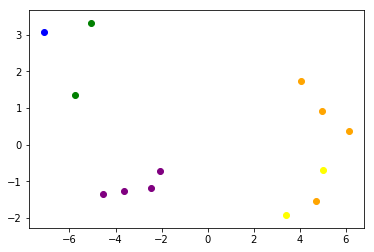

In [92]:
""" ------------------------ TRAIN CLASSIFIER -------------------------------"""

# Training
KNN = KNeighborsClassifier(n_neighbors=3)  

# 1. Instantiate the method and fit_transform the algotithm
LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
projected_data = LDA.fit_transform(X_train,y_train)
projected_test = LDA.transform(X_test)

KNN.fit(projected_data, y_train) 
print("Training done with k=2!")

""" ------------------------ RESULTS FOR K = 2 ------------------------------"""
print("RESULTS FOR K=2")
print("-------------------------------------------------------")
#y_test = "M", "E", "M", "E"
y_pred_KNN = KNN.predict(projected_test)
print("y predicted:   ", y_pred_KNN)
print("y ground truth:",y_test, "\n")

print("Confusion matrix: \n",confusion_matrix(y_test, y_pred_KNN))  
print(classification_report(y_test, y_pred_KNN)) 

""" -------------------------- PLOT RESULT --------------------------------- """
# Plot results
# TRAIN
plt.scatter(projected_data[0,0], projected_data[0,1], color = 'blue')
plt.scatter(projected_data[1:3,0], projected_data[1:3,1], color = 'orange')
plt.scatter(projected_data[5:7,0], projected_data[5:7,1], color = 'orange')
plt.scatter(projected_data[3:5,0], projected_data[3:5,1], color = 'purple')
plt.scatter(projected_data[7:10,0], projected_data[7:10,1], color = 'purple')

# TEST
plt.scatter(projected_test[0,0], projected_test[0,1], color = 'yellow')
plt.scatter(projected_test[1,0], projected_test[1,1], color = 'green')
plt.scatter(projected_test[2,0], projected_test[2,1], color = 'yellow')
plt.scatter(projected_test[3,0], projected_test[3,1], color = 'green')

In [0]:
error = []
print("Ground truth:",y_test, "\n")

# Calculating error for K values between 1 and 40
for i in range(1, 9): 
    knn = KNeighborsClassifier(n_neighbors=i)
    
    lda = LinearDiscriminantAnalysis(n_components=3) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
    projected_data = lda.fit_transform(X_train,y_train)
    projected_test = lda.transform(X_test)

    knn.fit(projected_data, y_train)
    pred_i = knn.predict(projected_test)
    error.append(np.mean(pred_i != y_test))
    print("k = ", i,": ", pred_i)
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 9), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

if(PART == 0):
    plt.savefig(myDrive + '/Figures/KNN+LDA-ex' + str(EXERCISE))
else: plt.savefig(myDrive + '/Figures/KNN+LDA-ex' + str(EXERCISE) + '-p' + str(PART))